   ##   CLOSING STOCK PRICE PREDICTION OF THE CO-OPERATION (APPLE INC) 
   
   ## USING ARTIFICAL NEURAL NETWORK
   
   

### AM olanipekun temitope samson (Data science maniac)
### So i am going to be doing a prediction on the closing stock price of apple inc from the year 2013 - 2020,using

### the past 70 days of stock price.

### To do this i will be using the artificial recurrent neural network called long short term memory(LSTM)

### as the workflow proceeds i will be letting you see basics of understanding the codes with proper explanation
### in any litttle way i can..

In [30]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

In [35]:
#get the stock quote
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2013-01-01', end = '2020-09-11')
df 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,17.094694
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.878920
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.408764
2013-01-07,18.903572,18.400000,18.642857,18.710714,484156400.0,16.312239
2013-01-08,18.996071,18.616072,18.900356,18.761072,458707200.0,16.356150
...,...,...,...,...,...,...
2020-09-04,123.699997,110.889999,120.070000,120.959999,332607200.0,120.959999
2020-09-08,118.989998,112.680000,113.949997,112.820000,231366600.0,112.820000
2020-09-09,119.139999,115.260002,117.260002,117.320000,176940500.0,117.320000


As you can see from above,seems the stock market was closed for a day,because the the day we put for start didnt 

pop up,it was a day later the stock came up,so thats why its staring from the 2nd of Jan 2013 as shown in the 

output cell...

In [36]:
df.shape

(1938, 6)

In [57]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

so we can see see that our dataset which we got from the web is acually clean..

we can then proceed to visualization (we just want to get to see some things in our DATA)

We would love to do a visualization for the closing price history and give just an obdservational thoughts as 

regards what we can see observe from the visualizations....

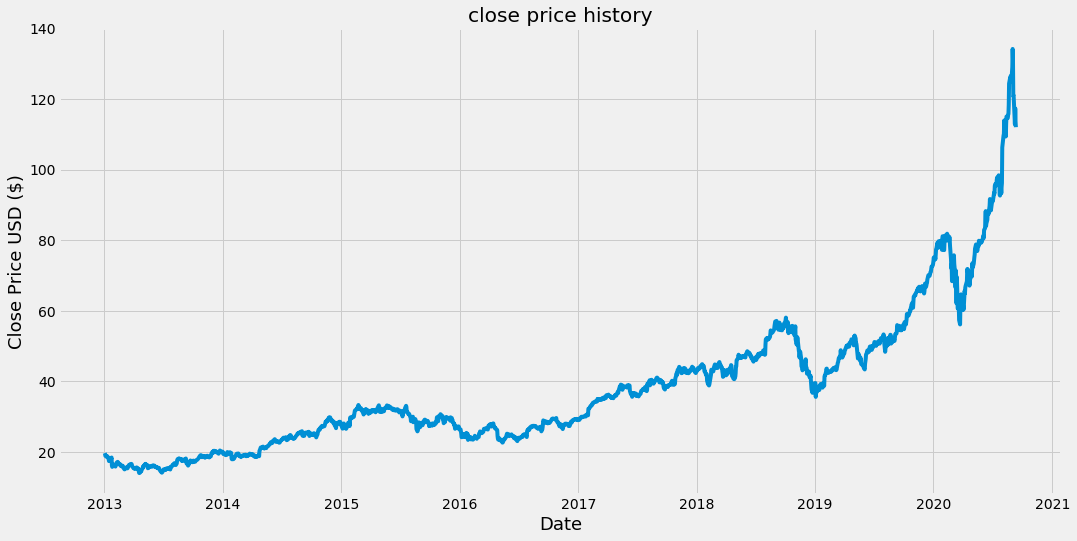

In [37]:
#visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

seems like apple stock price has being increasing all ovwr the years,really looks like a good product to buy 

though..well this is just am observation m seeing right now though...its not a fianacial advice though..

well from the above diagram it also shows that if you had bought an apple product around 2013-2014 for 20-30usd

by  2019-2020.  you would have  gotten enough of profit..

take note its based on observation thats being seen presently

The next step is to create a datatframe with the CLOSE column alone and also get the number of rows to train the

model on

In [38]:
#create a dataframe wiht the close column
data = df.filter(['Close'])
#covert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1551

you would have wondered why we are using (.8) and (math.ceil) that shows that we taking 80% of 1938  the training

set and math.ceil is used for rounding it off,and thats hwo we got  1551

## Scalling the data

In [39]:

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
#scalaer .fit transform computes the min and max value to be used for scaling and tranfromed the data based 
#on the values (0,1)

array([[0.04708139],
       [0.04502289],
       [0.04053753],
       ...,
       [0.85977174],
       [0.82791678],
       [0.81552414]])

You can see the values we got after we ran the cell are between zero and one(0,1)

SPLITING THE DATASET INTO x_train and y_train

well before we do that,we create the training dataset

In [40]:
#create the trainning dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len,:]
#spliting the dataset into x_train and y_train
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.04708139, 0.04502289, 0.04053753, 0.0396167 , 0.04003553,
       0.0375968 , 0.03950084, 0.03854735, 0.03303719, 0.02833499,
       0.03432634, 0.03331344, 0.03251736, 0.03393425, 0.03667894,
       0.01781369, 0.0146591 , 0.01761468, 0.02012172, 0.01969399,
       0.01929595, 0.01874047, 0.01538388, 0.019994  , 0.01984845,
       0.02307731, 0.02508533, 0.0265557 , 0.02298226, 0.02271789,
       0.02259313, 0.02068314, 0.02063265, 0.01732358, 0.01649483,
       0.01790578, 0.01552646, 0.01735923, 0.01605223, 0.01511061,
       0.01186392, 0.00876872, 0.01206293, 0.01043514, 0.01189659,
       0.01223522, 0.01406204, 0.01125795, 0.01123418, 0.01246691,
       0.01578192, 0.01936427, 0.0189989 , 0.01828302, 0.0184761 ,
       0.02120297, 0.02169903, 0.02097424, 0.01828302, 0.01548488])]
[0.011400530420072968]



From the above we can see some observations as i would call it...

that the y_train dataset contains the 61st value that we want our  model to predict

and the x_train dataset contains the past 60 values

next we would love to convert our x_train and y_train to numpy arrays

In [41]:
## coversion of  our x_train and y_train to numpy arrays

x_train,y_train = np.array(x_train),np.array(y_train)

## lets reshape the data

we are reshaping the data because LSTM network requires the input to be 3 dimeansional in the form of

number of samples,number of features,number of time steps and right now our x_train dataset is 2 dimeansional 

In [42]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1491, 60, 1)

its now 3 dimensional,yipee!!!!

## Building the LSTM model

In [43]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

## Compilation of the model

In [44]:


model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Take note:
    
an optimizer is used to improve upon the loss function and the loss function is used to measure how well the model

did on trainning

## MODEL TRAINING

In [ ]:
So if you would let me,
lets train the model!!!

In [45]:


model.fit(x_train,y_train,batch_size =1,epochs = 1)

1491/1491 [==============================] - 68s 45ms/step - loss: 3.2726e-04


Take note:
    
Batch size simply means the total number of training samples present in a single batch

while epoch is the number of iterations when an entire dataset is passed forward and backward through a 

neural netwrok

In [46]:
#create the testing dataset
#create a new array containing the scaled values from 1491 to 1551
test_data = scaled_data[training_data_len - 60: , :]
#lets create the dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
#y_test will be all the values we want our model to predict
for i in range (60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

we are going to append the past 60 values to our x_test dataset

We would love to convert the data to a numpy array anytime we want to use in the LSTM MODEL

In [47]:

x_test = np.array(x_test)


In [48]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(387, 60, 1)

In [49]:
#get the models price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)#here we are unscalling the values
#now we want our predictions to contain the same value tha our y_test contains..

#we want to evaluate our model...

we can do that by getting the root mean squared error(RMSE)

this tells us how accurate the model predicts the response

its also the standard deviation of hte residuals

take note: the lower values of RMSE indicates a better fit.....

In [50]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse 

0.6632137939295412

This is good to go!!!!!

Lets plot the data!!!!

C:\Users\user\anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


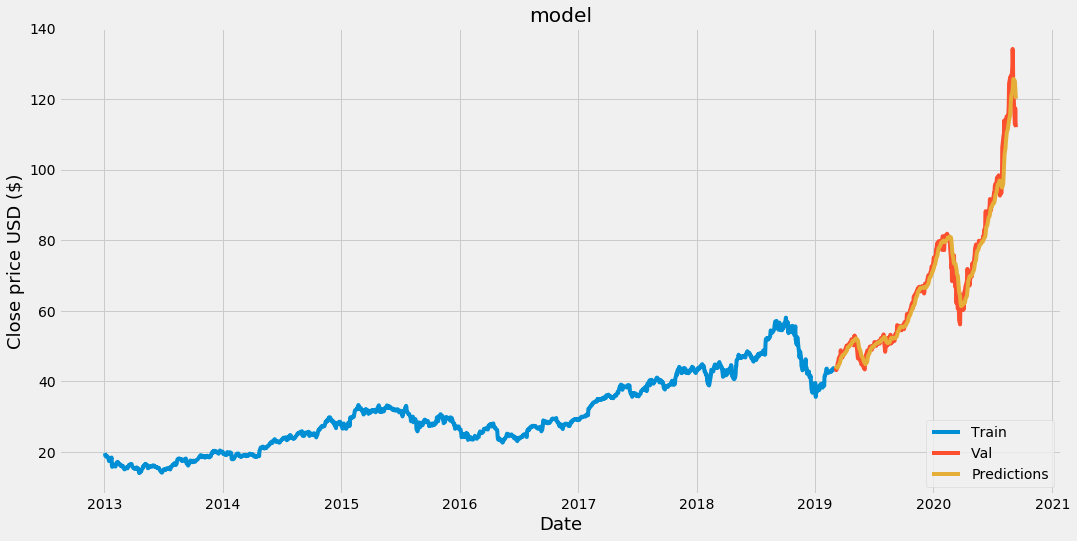

In [51]:
#plot the data
train =data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close price USD ($)' , fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train','Val','Predictions'],loc ='lower right')
plt.show()

The blue lines shows the data the model was trained on,the redish lines shows the actual stock price for apple for

the rest of the days and the orangish yellow is showing the predictions what our model predicted and you can see 

that they are really close...This really looks like a model is pretty decent....

So we want to see what we saw on the graph in a table so we do this.....

In [52]:
#showing the valid and predicted price
valid

,Close,predictions
Date,,
2019-03-04,43.962502,43.612617
2019-03-05,43.882500,43.721497
2019-03-06,43.630001,43.822800
2019-03-07,43.125000,43.888660
2019-03-08,43.227501,43.883926
...,...,...
2020-09-04,120.959999,125.660912
2020-09-08,112.820000,125.079140
2020-09-09,117.320000,123.413460


## we want to get the stock price for 12th of september 2020,so lets first predict and then

## get the actual value for

## the day

In [54]:
#get the stock quote
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start = '2013-01-01', end = '2020-09-11')
#create a new dataframe
new_df = apple_quote.filter(['Close'])
#get the last 60 days closing price values and covert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#covert the X_test dataset to a numpy array
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#Get the predicted sales price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[118.19036]]


this is what our model shows that this will be the predicted price for SEPTEMBER 12 2020

In [56]:
#lets get the actual 
apple_quote2 = web.DataReader('AAPL', data_source = 'yahoo', start = '2020-09-11', end = '2020-09-12')
apple_quote2['Close']

Date
2020-09-11    112
Name: Close, dtype: int64

In [ ]:
At leats its alittle close,